Requirements: data from https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv

In [1]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
# data from
# https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly
sales_transaction = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data = sales_transaction[[f'Normalized {i}' for i in range(52)]].values
som = MiniSom(8, 8, data.shape[1], sigma=2., learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 50000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.5033247696900034

...ready!


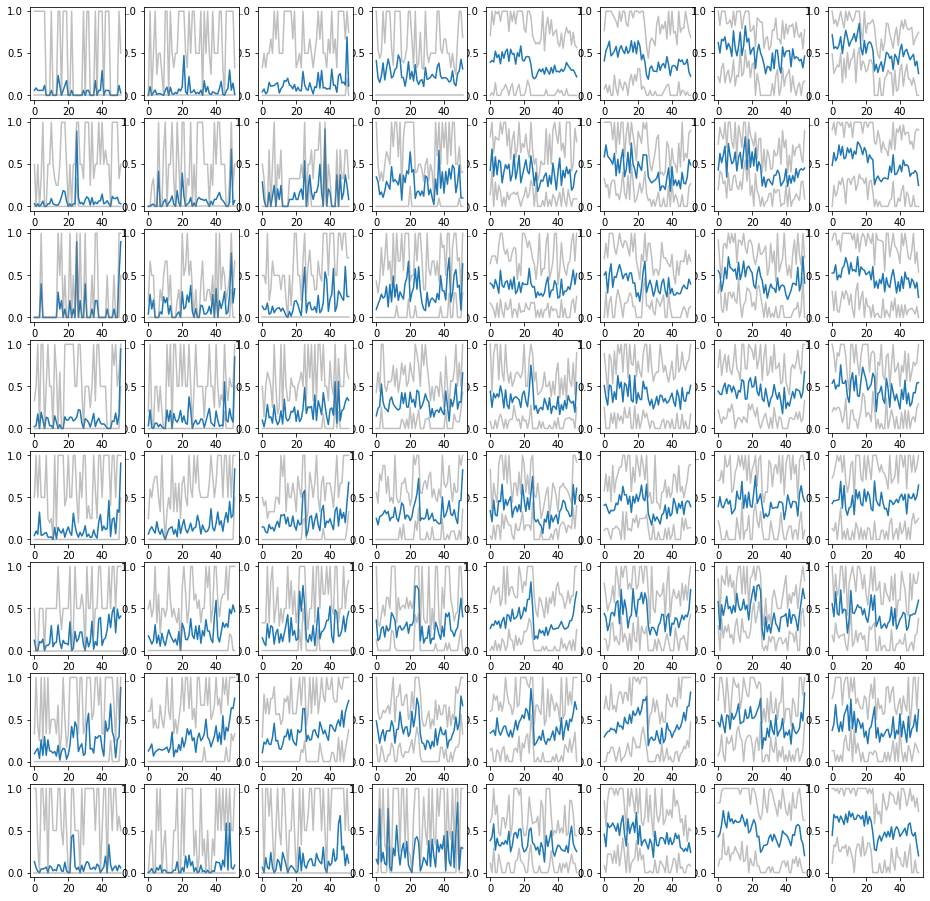

In [3]:
win_map = som.win_map(data)

plt.figure(figsize=(16, 16))
the_grid = GridSpec(8, 8)
for position in win_map.keys():
    plt.subplot(the_grid[6-position[1], position[0]])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
plt.savefig('resulting_images/time_series.png')
plt.show()